In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical
from collections import Counter
from Adaline import Adaline

data = pd.read_csv('glass.csv')

X = data.drop(['TYPE', 'Index'], axis=1)
y = data['TYPE']

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [39]:
model = Sequential([
    Dense(y.shape[1], activation='softmax'),
    Adaline(y.shape[1]),
    Dense(y.shape[1], activation='softmax'),
    
])

model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history = model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=8,
                       validation_split=0.2,)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Perceptron Test Accuracy: {test_acc:.4f}')

Epoch 1/100


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3506 - loss: 2.0661 - val_accuracy: 0.4000 - val_loss: 2.0439
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3739 - loss: 2.0231 - val_accuracy: 0.3143 - val_loss: 2.0137
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4509 - loss: 1.9772 - val_accuracy: 0.2571 - val_loss: 1.9817
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3674 - loss: 1.9452 - val_accuracy: 0.2571 - val_loss: 1.9460
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3422 - loss: 1.9093 - val_accuracy: 0.2571 - val_loss: 1.9073
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4418 - loss: 1.8260 - val_accuracy: 0.2571 - val_loss: 1.8654
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3274 - loss: 1.7992 - val_accuracy: 0.2571 - val_loss: 1.8235
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3707 - loss: 1.7220 - val_accuracy: 0.2571 - val_loss: 1.

In [35]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = np.argmax(y_test, axis=1)

print("\nSample predictions:")
for i in range(21):
    print(f"Sample {i+1}:")
    print(f"  Features: {X_test[i]}")
    print(f"  True class: {true_classes[i]}")
    print(f"  Predicted class: {predicted_classes[i]}")
    print(f"  Confidence: {np.max(predictions[i]):.2%}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Sample predictions:
Sample 1:
  Features: [-0.30566398 -0.50786254  0.5844687  -0.12149533  0.51561912  0.12447862
 -0.38373176 -0.33761134  0.49239859]
  True class: 1
  Predicted class: 1
  Confidence: 47.36%
Sample 2:
  Features: [-0.39739766  1.72870223 -2.03034913  1.93716871  0.89425902 -0.89595292
  0.00554633  0.94704191 -0.60110996]
  True class: 7
  Predicted class: 7
  Confidence: 92.33%
Sample 3:
  Features: [ 0.99498856 -0.44208122  0.62078562 -1.15082735 -0.48973509 -0.55580907
  0.64254685 -0.33761134  1.0888578 ]
  True class: 1
  Predicted class: 1
  Confidence: 74.04%
Sample 4:
  Features: [-0.80692302  1.92604619 -2.03034913  2.02119582  0.89425902 -0.89595292
 -0.12893155  0.90811303  0.29357885]
  True class: 7
  Predicted class: 7
  Confidence: 91.45%
Sample 5:
  Features: [-0.45964552  0.43938842  0.64257577  0.82380959 -0.69863986  0.24979477
 -0.7517765  -0.33761134 -0.60110996]
  True class: 2
  Predicted class: 2
  Confi

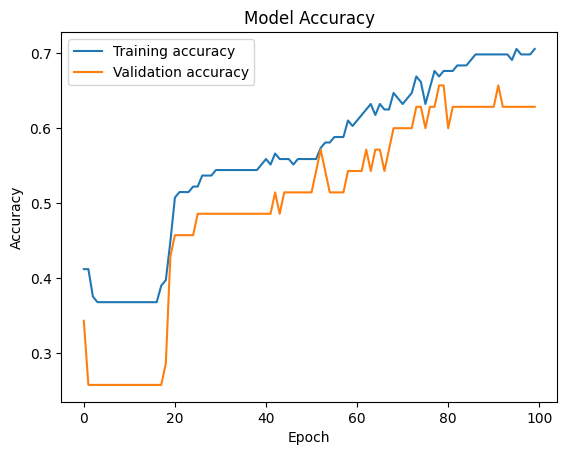

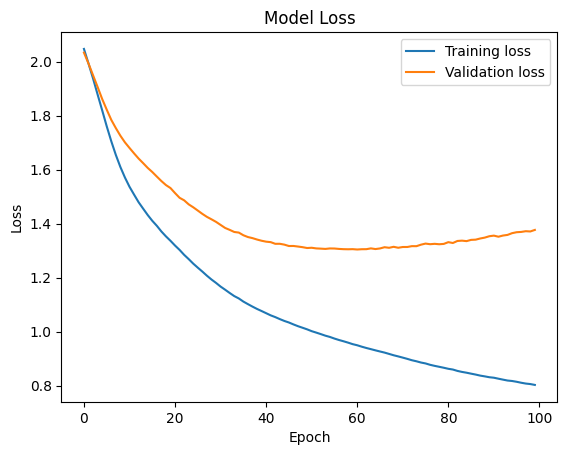

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [37]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (8, 8)                 │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ adaline_11 (Adaline)            │ (8, 8)                 │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (8, 8)                 │            72 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674 (2.64 KB)

 Trainable params: 224 (896.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450 (1.76 KB)